**Explain here methodlogy of your prcess.**

In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [92]:
sns.set_style("whitegrid")

In [93]:
df= pd.read_csv("stage3.csv",index_col=0)

In [94]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita
0,Afghanistan,2000,0.013896,0.065639,0.795517,0.001924,0.0,0.012411,1.111963,0.007581,0.157892,0.003800,0.565815,0.382126
1,Afghanistan,2001,0.034817,0.075552,0.816582,0.001060,0.0,0.020564,1.461090,0.005909,0.170245,0.003586,0.703912,0.387749
2,Afghanistan,2002,0.080074,0.085280,0.678975,0.001465,0.0,0.022338,1.385625,0.005172,0.139719,0.004991,0.703540,0.015021
3,Afghanistan,2003,0.124405,0.097893,0.665067,0.003312,0.0,0.024890,1.159752,0.005521,0.139696,0.005635,1.364174,0.013739
4,Afghanistan,2004,0.168035,0.111352,0.805915,0.003379,0.0,0.020600,1.085415,0.004780,0.121851,0.004538,0.152572,0.013314


<AxesSubplot:>

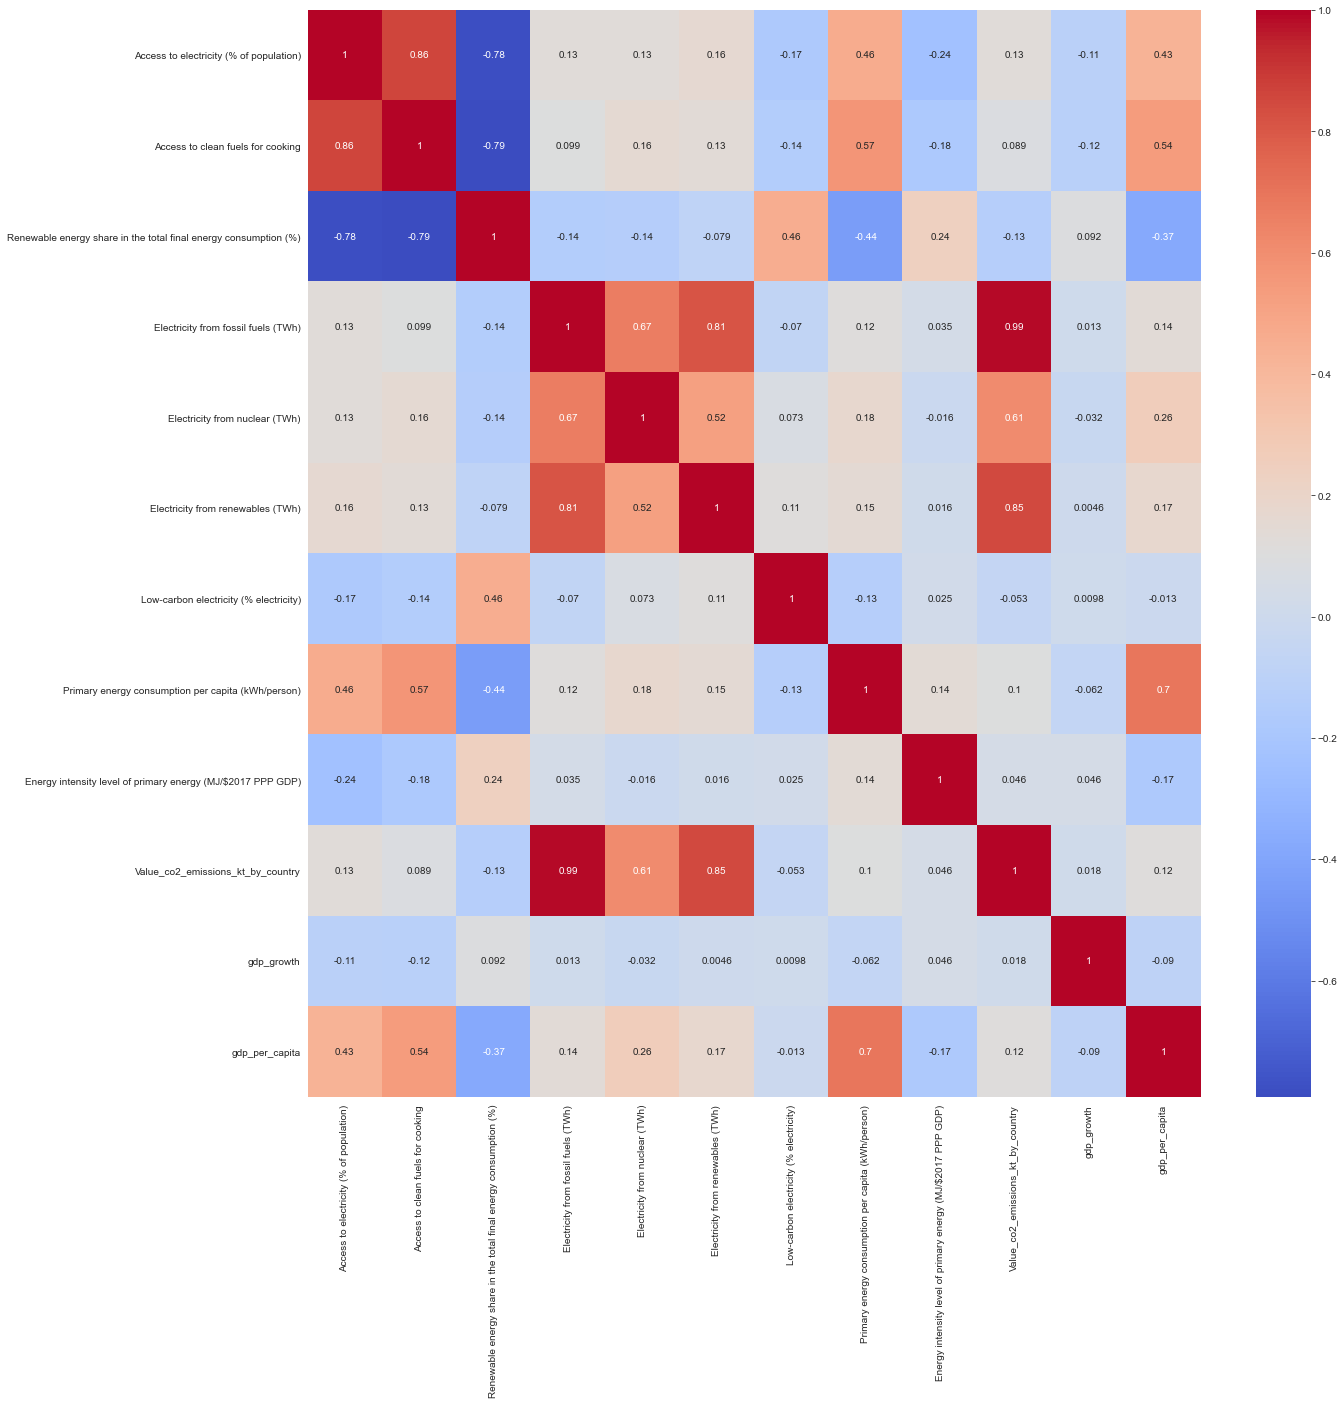

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop('Year',axis=1).corr(),annot=True,cmap='coolwarm')

In [96]:
# Series of countries with their descending order value of CO2 emissions. 
countries= df.groupby('Entity').mean()['Value_co2_emissions_kt_by_country'].sort_values(ascending=False)

**Add here method of dividing countries into groups**

In [97]:
group_A= list(countries[countries>20].index)
group_B= list(countries[(countries<10) & (countries>1)].index)
group_C= list(countries[(countries<1) & (countries>0.10)].index)

In [98]:
df_a= df[df['Entity'].isin(group_A)]
df_b=df[df['Entity'].isin(group_B)]
df_c=df[df['Entity'].isin(group_C)]

In [99]:
#Taking out data of 2010 from all the groups for last test.
df_a_2010= df_a[df_a['Year']==2010].drop(['Entity','Year'],axis=1)
df_b_2010= df_b[df_b['Year']==2010].drop(['Entity','Year'],axis=1)
df_c_2010= df_c[df_c['Year']==2010].drop(['Entity','Year'],axis=1)

In [100]:
#Remvoing Entity and Year from df_a,df_b, and df_c
df_a= df_a[df_a['Year']!=2010].drop(['Entity','Year'],axis=1)
df_b= df_b[df_b['Year']!=2010].drop(['Entity','Year'],axis=1)
df_c= df_c[df_c['Year']!=2010].drop(['Entity','Year'],axis=1)

## Group A Countries

<AxesSubplot:>

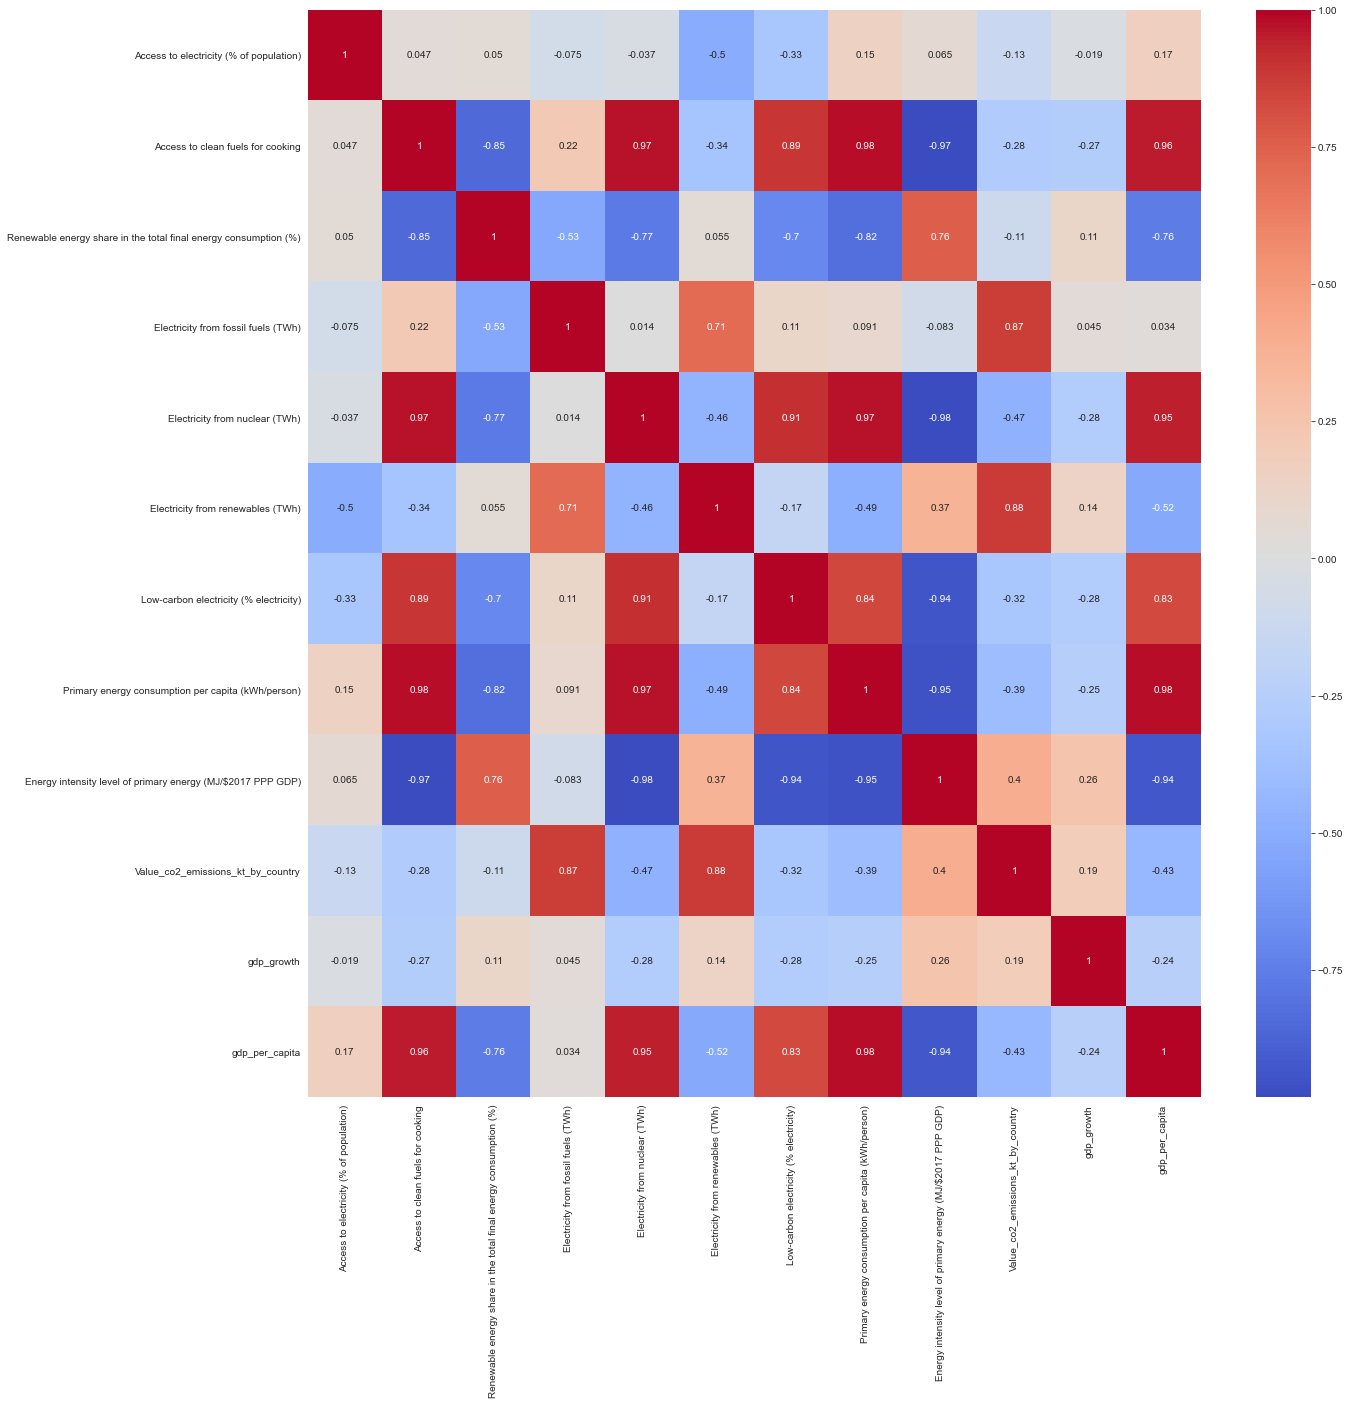

In [101]:
plt.figure(figsize=(20,20))
sns.heatmap(df_a.corr(),annot= True,cmap='coolwarm')

In [102]:
X= df_a.drop('Value_co2_emissions_kt_by_country',axis= 1)
y= df_a['Value_co2_emissions_kt_by_country']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [106]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1.3368126415399264
r2 score 0.9479635855572786
mean squared error 2.199161620343883
root mean square error 1.48295705276447
mean absoute percentage error 0.06021344825897717


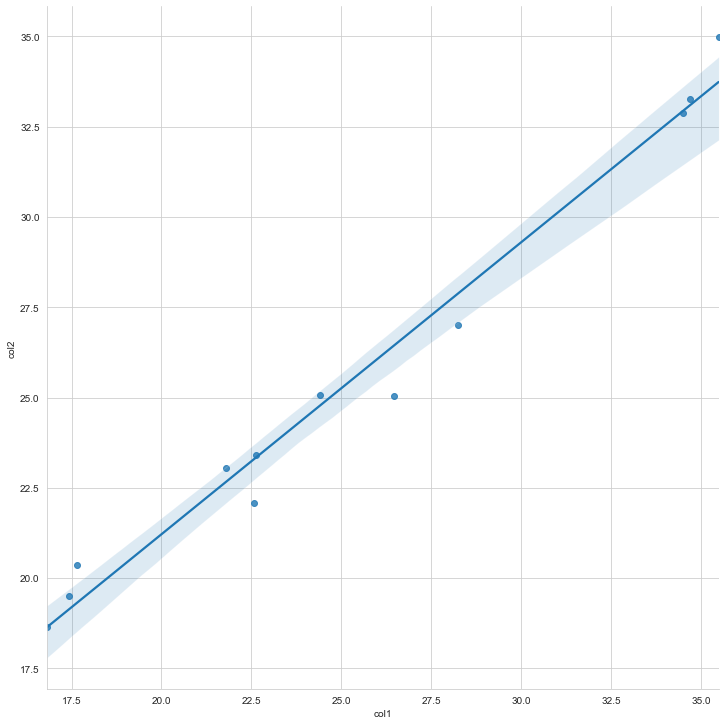

In [107]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})
sns.lmplot(x='col1',y='col2',data=check,height=10)

In [108]:
coef= pd.DataFrame(data={'Coef':lasso_model.coef_,'Features':X_test.columns})

In [109]:
coef

,Coef,Features
0,0.000000,Access to electricity (% of population)
1,-0.000000,Access to clean fuels for cooking
2,-0.000000,Renewable energy share in the total final ener...
3,4.054894,Electricity from fossil fuels (TWh)
4,-0.300636,Electricity from nuclear (TWh)
5,1.574645,Electricity from renewables (TWh)
6,-0.000000,Low-carbon electricity (% electricity)
7,-0.000000,Primary energy consumption per capita (kWh/per...
8,1.009658,Energy intensity level of primary energy (MJ/$...
9,0.000000,gdp_growth


In [110]:
X= df_a[['Electricity from fossil fuels (TWh)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)']]
y= df_a['Value_co2_emissions_kt_by_country']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [112]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [113]:
grid_search_a= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search_a.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [115]:
predictions= grid_search_a.predict(X_test)

In [116]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1.3322866535775126
r2 score 0.9201774161820205
mean squared error 3.373460001983993
root mean square error 1.8366981248926
mean absoute percentage error 0.05620636083707029


In [117]:
df_a.describe()['Value_co2_emissions_kt_by_country']

count    38.000000
mean     24.991096
std       6.788586
min      16.270063
25%      17.900833
50%      24.560970
75%      30.150496
max      36.159663
Name: Value_co2_emissions_kt_by_country, dtype: float64

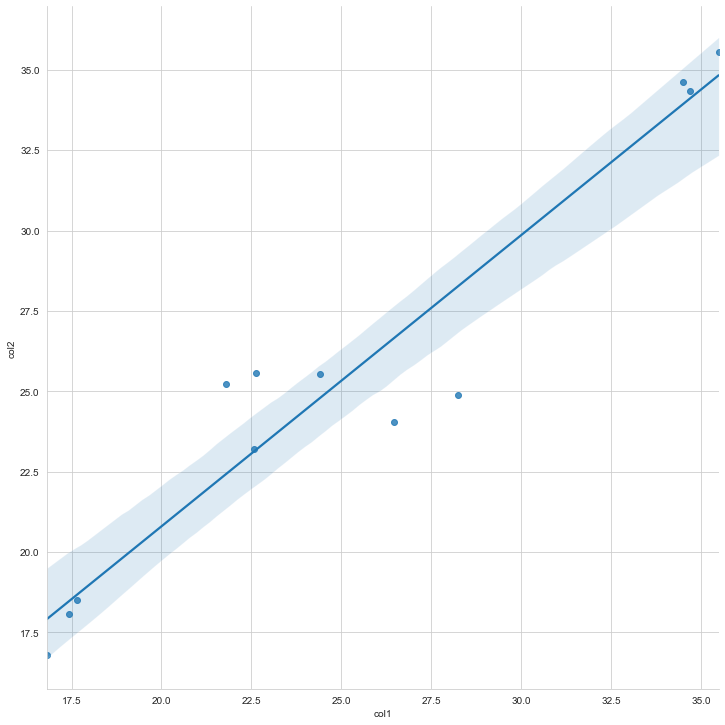

In [118]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})
sns.lmplot(x='col1',y='col2',data=check,height=10)

## Group B Countries 

<AxesSubplot:>

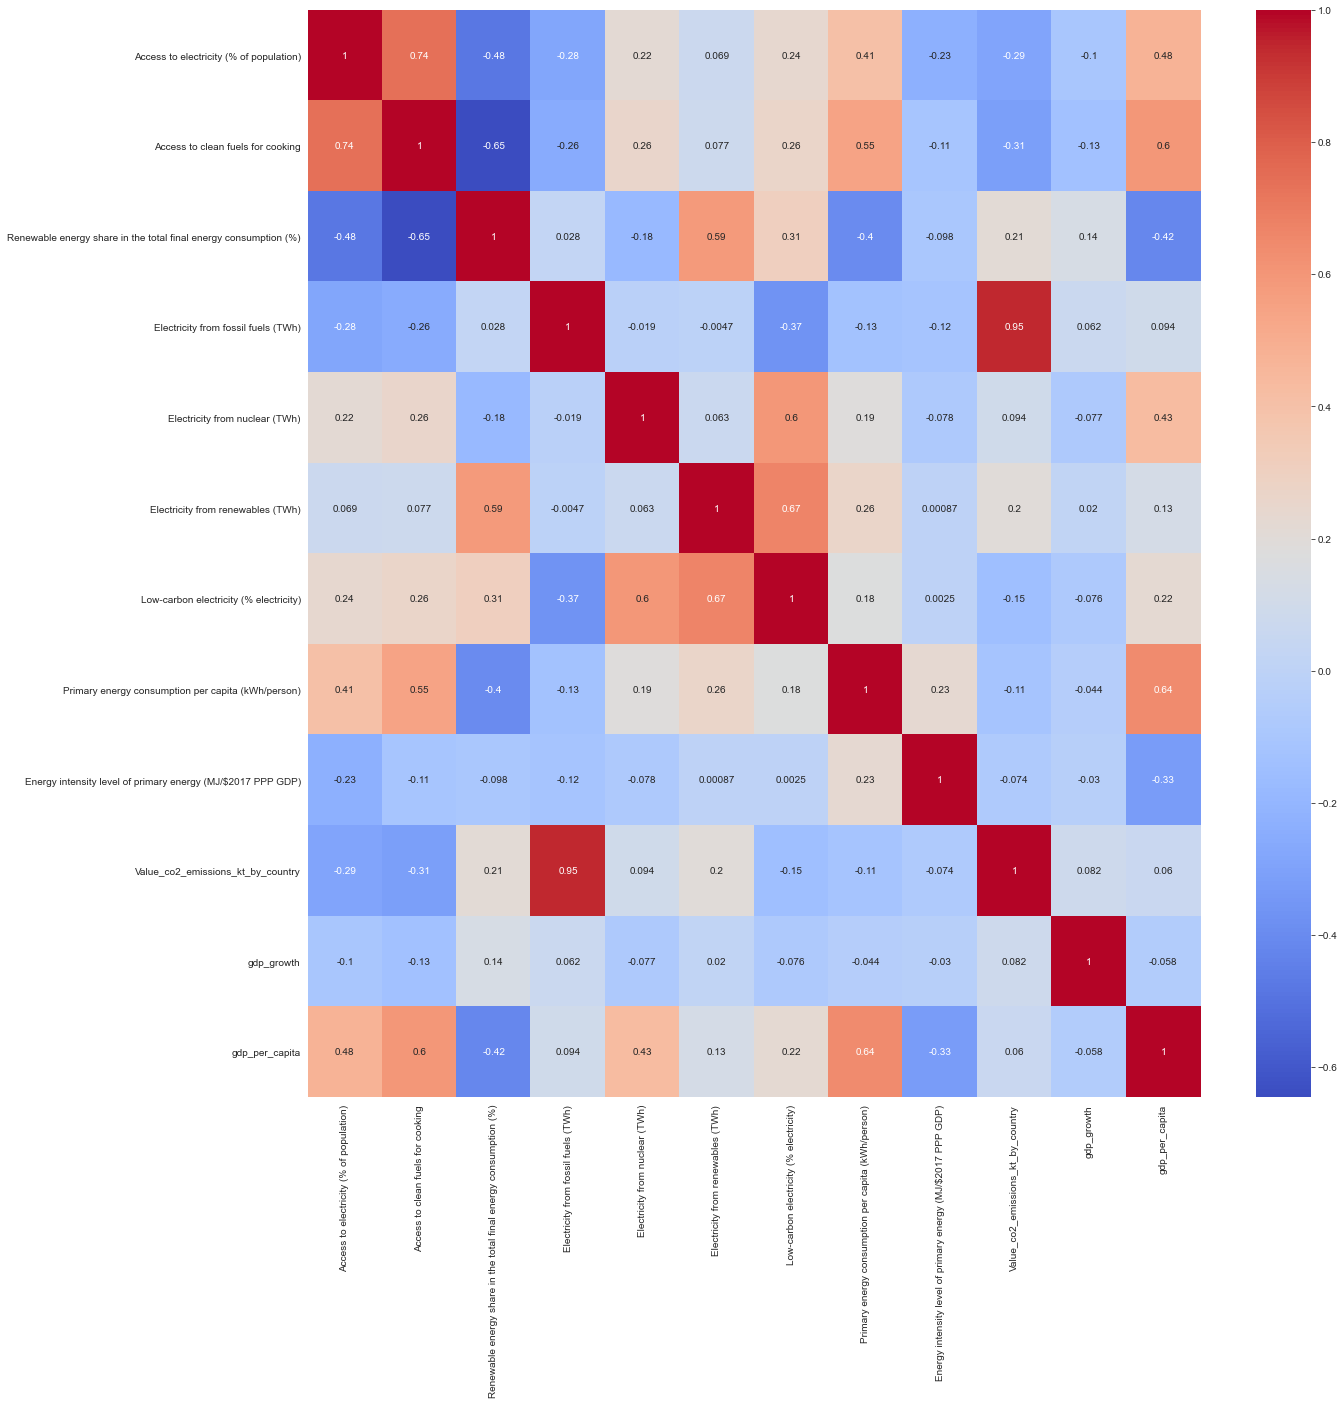

In [119]:
plt.figure(figsize=(20,20))
sns.heatmap(df_b.corr(),annot= True,cmap='coolwarm')

In [120]:
X= df_b.drop('Value_co2_emissions_kt_by_country',axis= 1)
y= df_b['Value_co2_emissions_kt_by_country']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [122]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [123]:
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [124]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 0.8022838362016657
r2 score 0.3725865199899856
mean squared error 1.4827151410551371
root mean square error 1.2176679108259103
mean absoute percentage error 0.40005499648904813


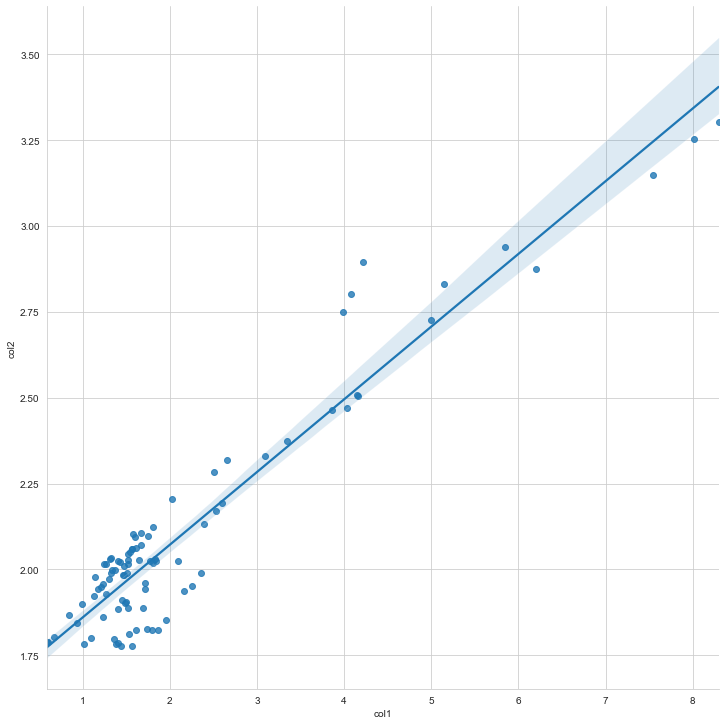

In [125]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})
sns.lmplot(x='col1',y='col2',data=check,height=10)

In [126]:
coef= pd.DataFrame(data={'Coef':lasso_model.coef_,'Features':X_test.columns})

In [127]:
coef

,Coef,Features
0,-0.000000,Access to electricity (% of population)
1,-0.000000,Access to clean fuels for cooking
2,0.000000,Renewable energy share in the total final ener...
3,0.324901,Electricity from fossil fuels (TWh)
4,0.000000,Electricity from nuclear (TWh)
5,0.000000,Electricity from renewables (TWh)
6,-0.000000,Low-carbon electricity (% electricity)
7,-0.000000,Primary energy consumption per capita (kWh/per...
8,-0.000000,Energy intensity level of primary energy (MJ/$...
9,0.000000,gdp_growth


**Only Electricity from fossil fuels (TWh) is a contributing feature in group B countries.**

In [128]:
X= df_b['Electricity from fossil fuels (TWh)'].to_numpy().reshape(-1,1)
y= df_b['Value_co2_emissions_kt_by_country'].to_numpy().reshape(-1,1)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [130]:
grid_search_b= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search_b.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [131]:
predictions= grid_search_b.predict(X_test)

In [132]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 0.3306702394406969
r2 score 0.9085726206268215
mean squared error 0.21606287404191576
root mean square error 0.4648256383224959
mean absoute percentage error 0.18468968359013488


In [133]:
df_b.describe()['Value_co2_emissions_kt_by_country']

count    304.000000
mean       2.121263
std        1.445308
min        0.590086
25%        1.371788
50%        1.601616
75%        2.137398
max        8.295242
Name: Value_co2_emissions_kt_by_country, dtype: float64

Text(0, 0.5, 'predictions')

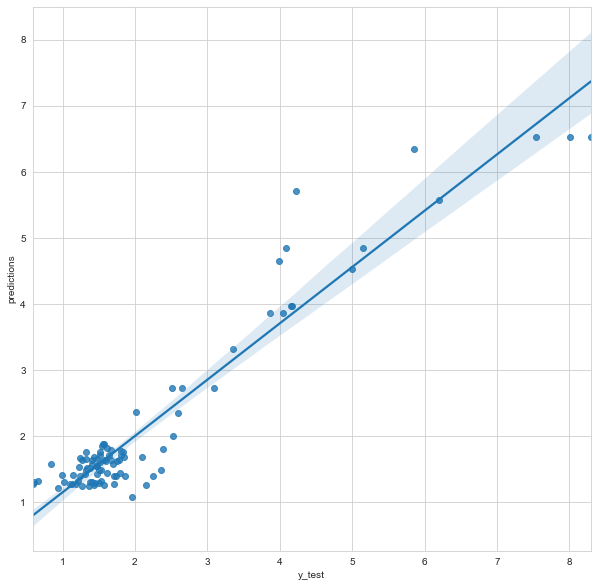

In [134]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")

## Group C Countries

<AxesSubplot:>

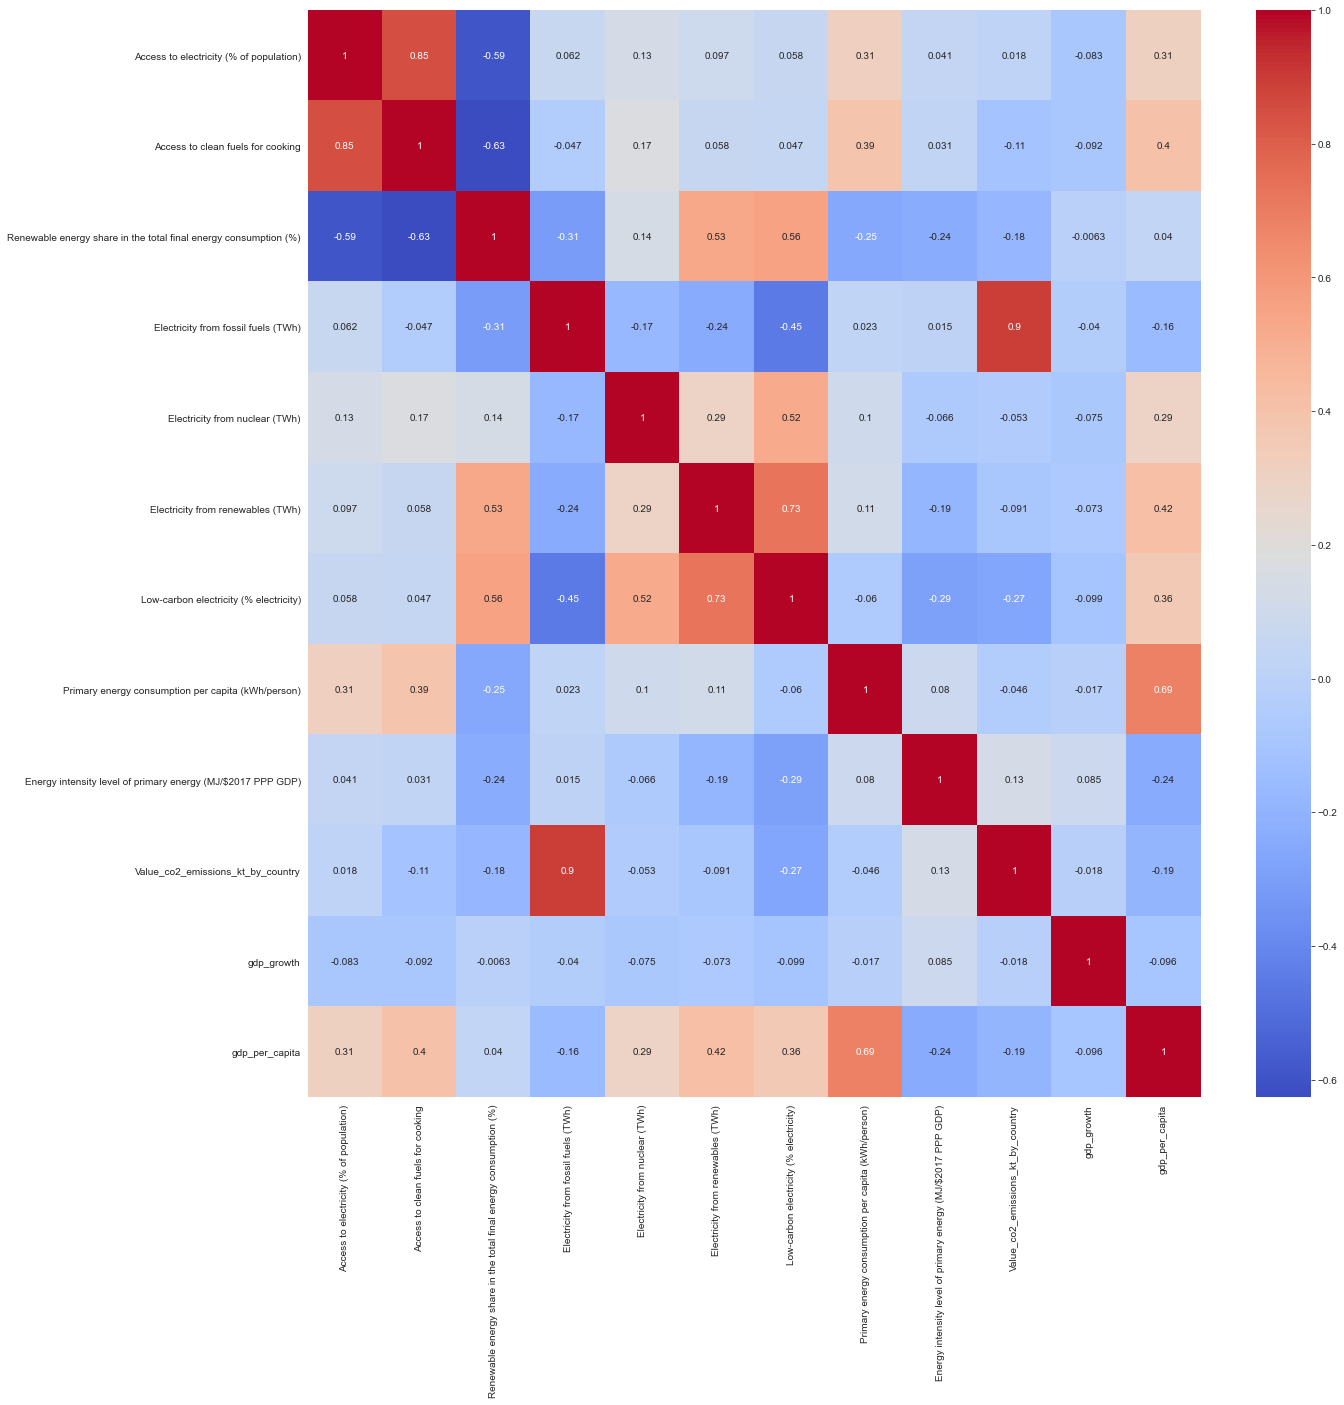

In [135]:
plt.figure(figsize=(20,20))
sns.heatmap(df_c.corr(),annot= True,cmap='coolwarm')

In [136]:
X= df_c.drop('Value_co2_emissions_kt_by_country',axis= 1)
y= df_c['Value_co2_emissions_kt_by_country']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [138]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [140]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 0.15984729701834466
r2 score -0.0029297541491424273
mean squared error 0.03858145032183559
root mean square error 0.19642161368300481
mean absoute percentage error 0.7055390000642596


In [141]:
coef= pd.DataFrame(data={'Coef':lasso_model.coef_,'Features':X_test.columns})

In [142]:
coef

,Coef,Features
0,-0.0,Access to electricity (% of population)
1,-0.0,Access to clean fuels for cooking
2,-0.0,Renewable energy share in the total final ener...
3,0.0,Electricity from fossil fuels (TWh)
4,-0.0,Electricity from nuclear (TWh)
5,-0.0,Electricity from renewables (TWh)
6,-0.0,Low-carbon electricity (% electricity)
7,-0.0,Primary energy consumption per capita (kWh/per...
8,0.0,Energy intensity level of primary energy (MJ/$...
9,-0.0,gdp_growth


**Observations:** <br>
- From Coeffciants it looks like there is no considerable impact of features. Lets try to calculate using Electricity from fossil fuels (TWh) which has highest correlation with the target variable.

In [143]:
X= df_c['Electricity from fossil fuels (TWh)'].to_numpy().reshape(-1,1)
y= df_c['Value_co2_emissions_kt_by_country'].to_numpy().reshape(-1,1)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [145]:
grid_search_c= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search_c.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [146]:
predictions= grid_search_c.predict(X_test)

In [147]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 0.06060582144362204
r2 score 0.8319503798885934
mean squared error 0.0064646582107159446
root mean square error 0.08040309826565109
mean absoute percentage error 0.2678930210020879


In [148]:
df_c.describe()['Value_co2_emissions_kt_by_country']

count    848.000000
mean       0.311731
std        0.198878
min        0.087501
25%        0.160936
50%        0.245361
75%        0.406014
max        0.949100
Name: Value_co2_emissions_kt_by_country, dtype: float64

Text(0, 0.5, 'predictions')

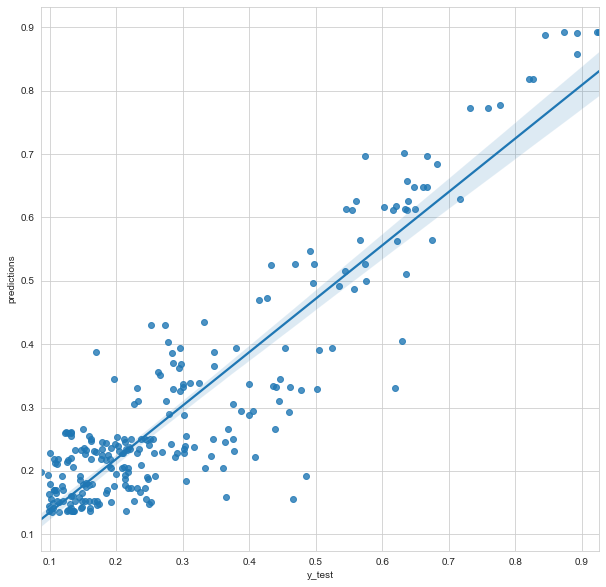

In [149]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")

# Evaluation of models on 2010 data.

In [157]:
X_a= df_a_2010[['Electricity from fossil fuels (TWh)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)']]
y_a= df_a_2010['Value_co2_emissions_kt_by_country']

In [158]:
predictions_a= grid_search_a.predict(X_a)

In [159]:
print("mean absolute error",mean_absolute_error(y_a,predictions_a))
print("r2 score",r2_score(y_a,predictions_a))
print("mean squared error",mean_squared_error(y_a,predictions_a))
print("root mean square error",np.sqrt(mean_squared_error(y_a,predictions_a)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_a,predictions_a))

mean absolute error 2.2181125858932784
r2 score 0.8503049083988471
mean squared error 4.9355241143586355
root mean square error 2.221603950833414
mean absoute percentage error 0.09147076989484432


In [160]:
df_a_2010.describe()['Value_co2_emissions_kt_by_country']

count     2.000000
mean     25.828521
std       8.120408
min      20.086525
25%      22.957523
50%      25.828521
75%      28.699519
max      31.570517
Name: Value_co2_emissions_kt_by_country, dtype: float64

In [167]:
X_b= df_b_2010['Electricity from fossil fuels (TWh)'].to_numpy().reshape(-1,1)
y_b= df_b_2010['Value_co2_emissions_kt_by_country'].to_numpy().reshape(-1,1)

In [168]:
predictions_b= grid_search_b.predict(X_b)

In [169]:
print("mean absolute error",mean_absolute_error(y_b,predictions_b))
print("r2 score",r2_score(y_b,predictions_b))
print("mean squared error",mean_squared_error(y_b,predictions_b))
print("root mean square error",np.sqrt(mean_squared_error(y_b,predictions_b)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_b,predictions_b))

mean absolute error 0.27125230862088134
r2 score 0.923211694877668
mean squared error 0.13513035632856513
root mean square error 0.3676008111097759
mean absoute percentage error 0.14093738918232573


In [170]:
df_b_2010.describe()['Value_co2_emissions_kt_by_country']

count    16.000000
mean      2.037957
std       1.370072
min       1.001773
25%       1.406624
50%       1.566117
75%       1.847992
max       6.183707
Name: Value_co2_emissions_kt_by_country, dtype: float64

In [171]:
X_c= df_c_2010['Electricity from fossil fuels (TWh)'].to_numpy().reshape(-1,1)
y_c= df_c_2010['Value_co2_emissions_kt_by_country'].to_numpy().reshape(-1,1)

In [172]:
predictions_c= grid_search_c.predict(X_c)

In [173]:
print("mean absolute error",mean_absolute_error(y_c,predictions_c))
print("r2 score",r2_score(y_c,predictions_c))
print("mean squared error",mean_squared_error(y_c,predictions_c))
print("root mean square error",np.sqrt(mean_squared_error(y_c,predictions_c)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_c,predictions_c))

mean absolute error 0.054518808585423004
r2 score 0.855177006743258
mean squared error 0.005546111656760859
root mean square error 0.07447222070517878
mean absoute percentage error 0.21910338487685105


In [174]:
df_c_2010.describe()['Value_co2_emissions_kt_by_country']

count    45.000000
mean      0.303641
std       0.197904
min       0.090559
25%       0.175381
50%       0.229731
75%       0.397550
max       0.873105
Name: Value_co2_emissions_kt_by_country, dtype: float64

In [181]:
df_a_2010['Predicted_V']= predictions_a
df_b_2010['Predicted_V']= predictions_b
df_c_2010['Predicted_V']= predictions_c

In [182]:
df_2010_P= pd.concat([df_a_2010,df_b_2010,df_c_2010])

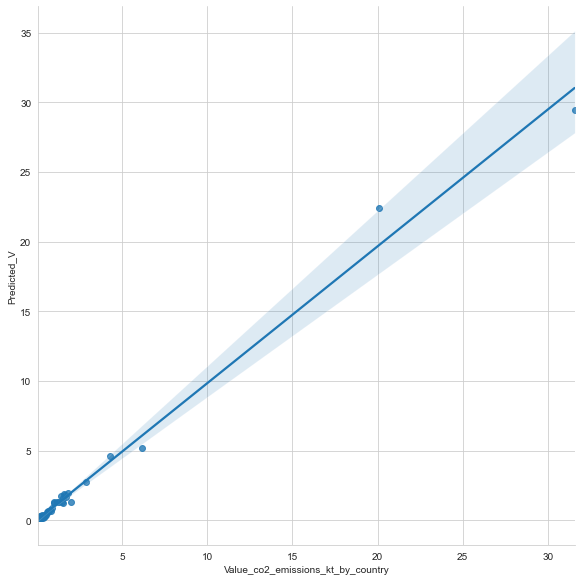

In [216]:
sns.lmplot(x='Value_co2_emissions_kt_by_country',y='Predicted_V',data= df_2010_P,height=8)

In [217]:
a= df_2010_P['Value_co2_emissions_kt_by_country']
b= df_2010_P['Predicted_V']

In [219]:
print("mean absolute error",mean_absolute_error(a,b))
print("r2 score",r2_score(a,b))
print("mean squared error",mean_squared_error(a,b))
print("root mean square error",np.sqrt(mean_squared_error(a,b)))
print("mean absoute percentage error",mean_absolute_percentage_error(a,b))

mean absolute error 0.17824775390578876
r2 score 0.9908910755975842
mean squared error 0.19496363419886586
root mean square error 0.441546865235012
mean absoute percentage error 0.19519987438357458
